# OpenLDAP
OpenLDAP is an open-source LDAP implementation.  LDAP servers, like OpenLDAP and Active Directory, are often used as an Identity Provider (IdP) to store users and groups for organizations and enterprises.

## Prerequisites
- [Learning Jupyter](../getting-started/learning_jupyter.ipynb)
- Install Jupyter bash kernel:
  - Windows... coming soon!
  - [Mac](../getting-started/mac/install_jupyter_bash_kernel.ipynb)
  - [Linux](../getting-started/linux/install_jupyter_bash_kernel.ipynb)
- [Install Kubernetes](../kubernetes/install_k8s_cluster.ipynb)
- Configure DNS
  - Mac: [Install DNSmasq](../dnsmasq/mac/install_dnsmasq.ipynb)
  - Linux: [Install DNSmasq](../../dnsmasq/linux/install_dnsmasq.ipynb)
  - Windows: Install Acrylic... coming soon!
- [Install Monitoring](../monitoring/install_kube-prometheus-stack.ipynb)
- [Install Logging](../logging/install_loki.ipynb)
- [Install cert-manager](../cert-manager/install_cert-manager.ipynb)
- [Install Ingress Controller](../ingress/install_ingress-nginx.ipynb)
- [Install Postgres](../postgres/install_postgres.ipynb)

## Install OpenLDAP
For our OpenLDAP installation, we're going to use a helm chart that combines the [OpenLDAP](https://www.openldap.org), [phpLDAPAdmin](https://github.com/leenooks/phpLDAPadmin), and the [LDAP Toolbox Self-Service Password](https://github.com/ltb-project/self-service-password) projects.

### Register Helm Repository
Start by first registering the helm registry:

In [1]:
git clone https://github.com/helm/charts.git

Cloning into 'charts'...
remote: Enumerating objects: 129385, done.
remote: Total 129385 (delta 0), reused 0 (delta 0), pack-reused 129385
Receiving objects: 100% (129385/129385), 284.55 MiB | 3.22 MiB/s, done.
Resolving deltas: 100% (87201/87201), done.


### Install Helm Chart
Install the helm chart next:

In [2]:
helm upgrade --install -n openldap --create-namespace openldap charts/stable/openldap -f values.openldap.nephtek.yaml

Release "openldap" does not exist. Installing it now.
NAME: openldap
LAST DEPLOYED: Sun Oct  2 14:11:11 2022
NAMESPACE: openldap
STATUS: deployed
REVISION: 1
NOTES:
OpenLDAP has been installed. You can access the server from within the k8s cluster using:

  openldap.openldap.svc.cluster.local:389


You can access the LDAP adminPassword and configPassword using:

  kubectl get secret --namespace openldap openldap -o jsonpath="{.data.LDAP_ADMIN_PASSWORD}" | base64 --decode; echo
  kubectl get secret --namespace openldap openldap -o jsonpath="{.data.LDAP_CONFIG_PASSWORD}" | base64 --decode; echo


You can access the LDAP service, from within the cluster (or with kubectl port-forward) with a command like (replace password and domain):
  ldapsearch -x -H ldap://openldap.openldap.svc.cluster.local:389 -b dc=example,dc=org -D "cn=admin,dc=example,dc=org" -w $LDAP_ADMIN_PASSWORD


Test server health using Helm test:
  helm test openldap


You can also consider installing the helm chart for php

Next use Kustomize to install phpLdapAdmin:

In [3]:
kubectl apply -k kustomize/overlays/rancher-desktop

configmap/phpldapadmin created
service/phpldapadmin created
deployment.apps/phpldapadmin created
ingress.networking.k8s.io/phpldapadmin created


### Login to phpldapadmin
After the helm chart has installed and the pods in the `openldap` namespace are ready, a new ingress is exposed:

- https://phpldapadmin.k8s.nephtek.com

To login to phpLDAPAdmin, use the username `cn=admin,dc=nephtek,dc=com` and the password `admin`.  Depending upon your browser (e.g. Safari on MacOS), you may need to reload the page after logging in: 

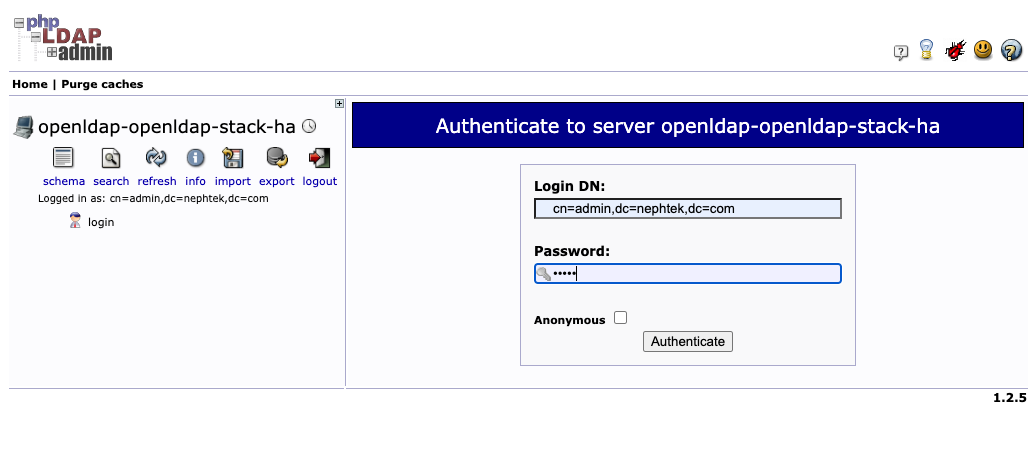


### Finished

### Next Steps
- [Install Keycloak](../keycloak/install_keycloak.ipynb)